In [2]:
import pandas as pd
import numpy as np
import sweetviz as sw

In [3]:
data=pd.read_csv(r"C:\Users\91996\Desktop\ML\unsupervised.csv")

In [4]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [6]:
report=sw.analyze(data)

                                             |                                             | [  0%]   00:00 ->…


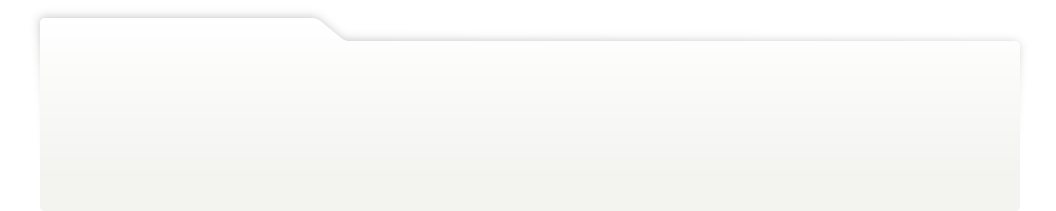
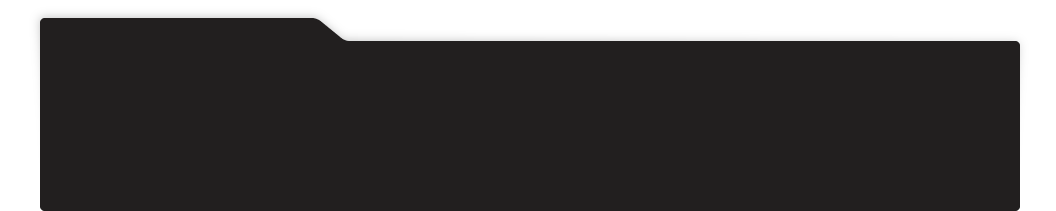
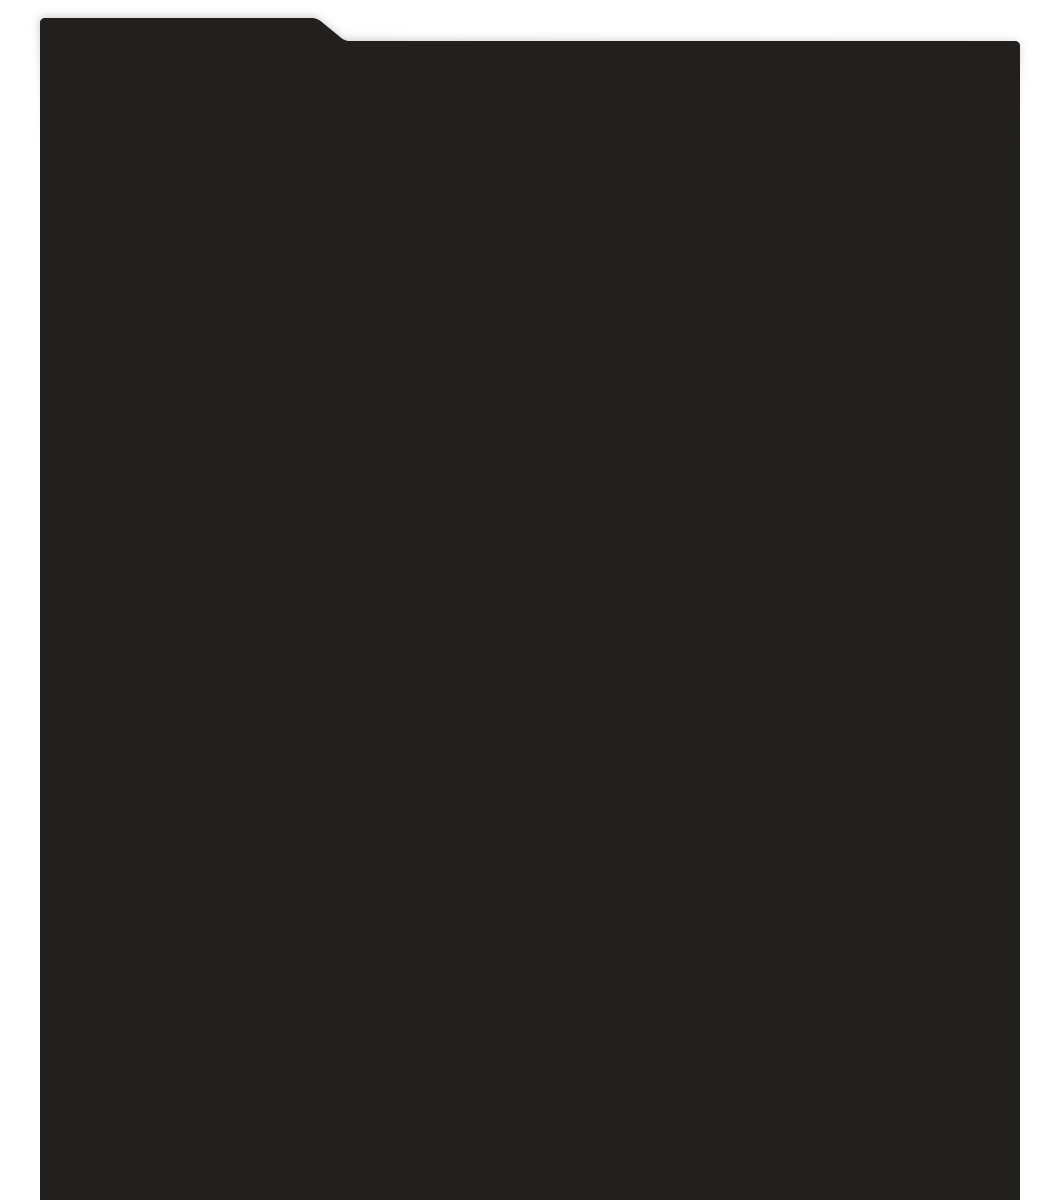
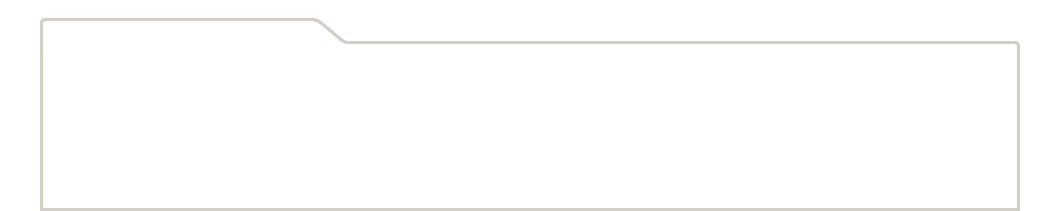
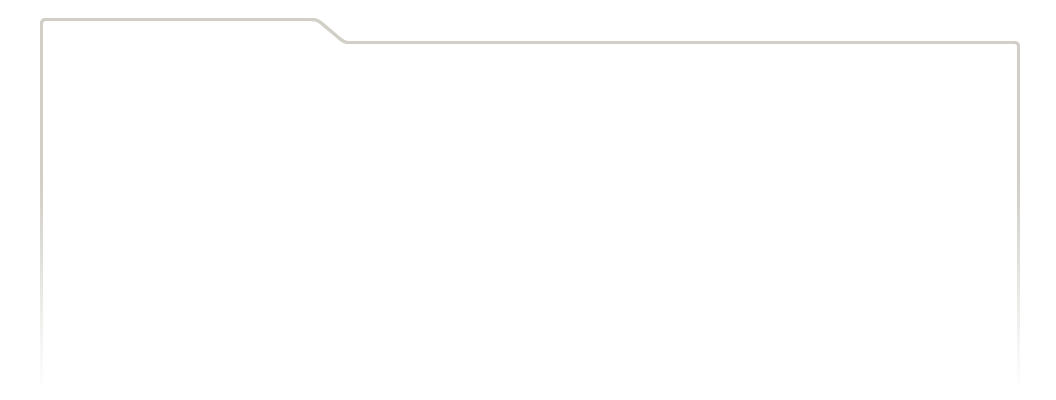
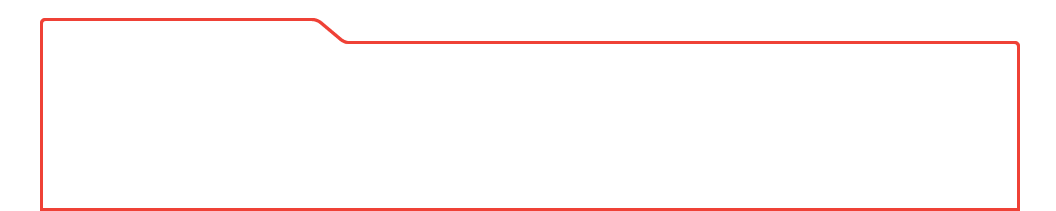
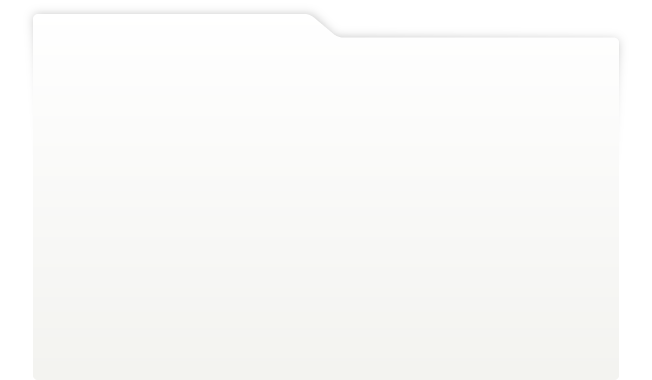
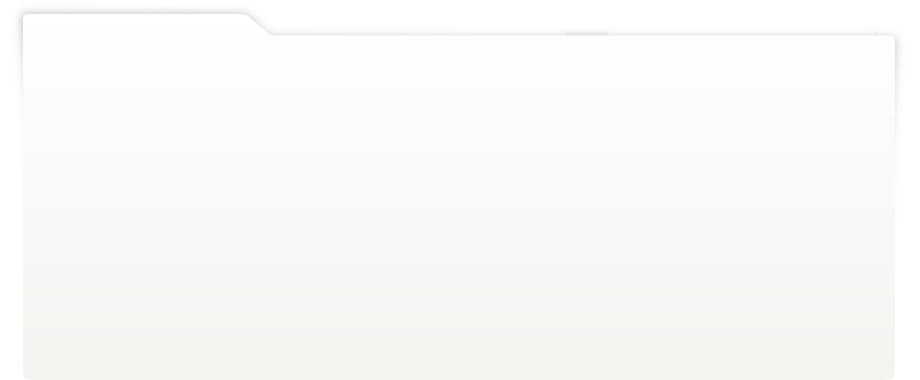
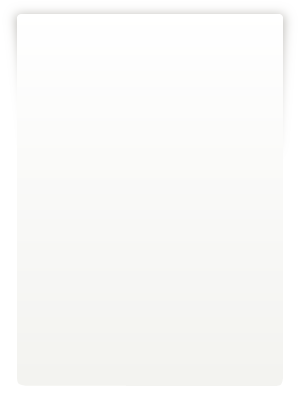
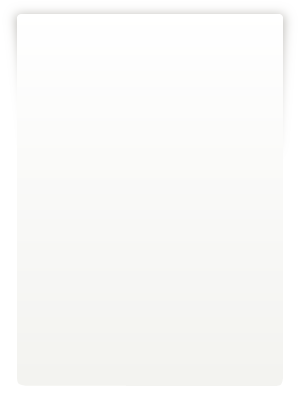
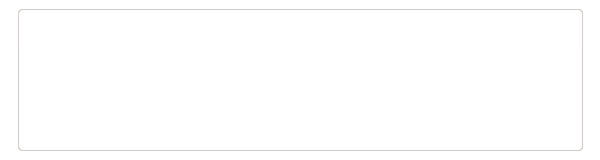
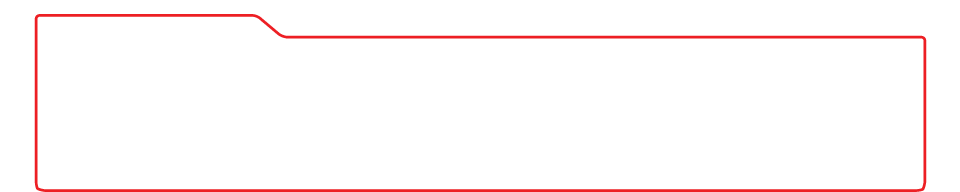
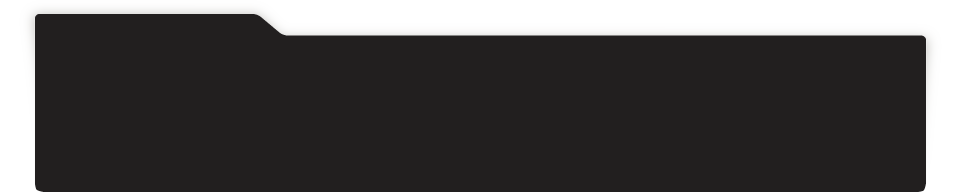
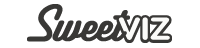
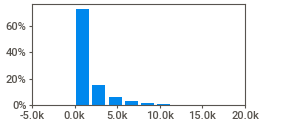
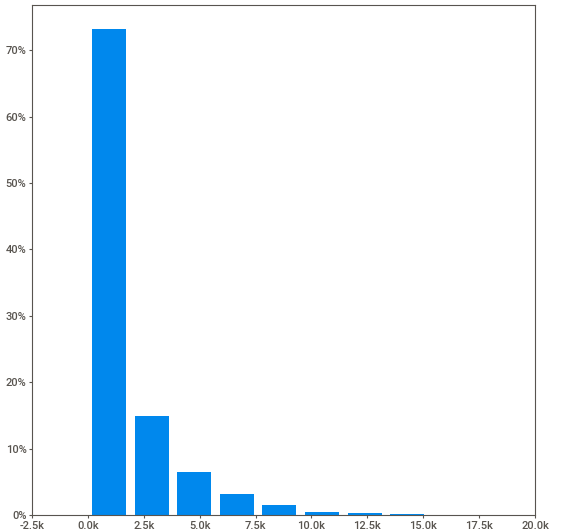
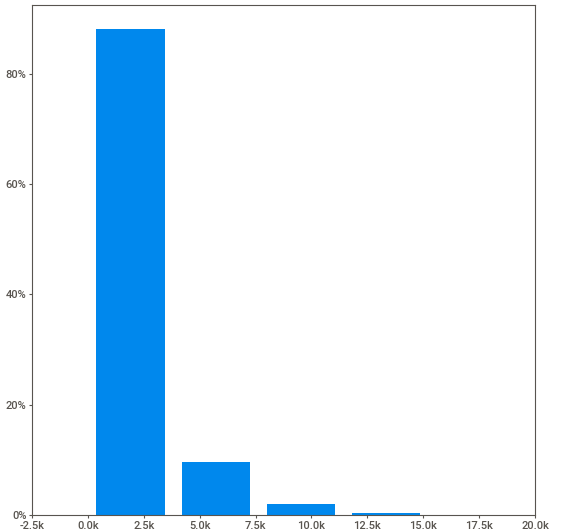
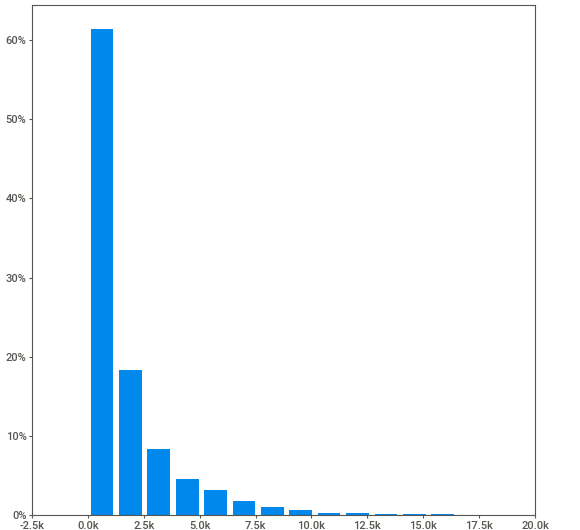
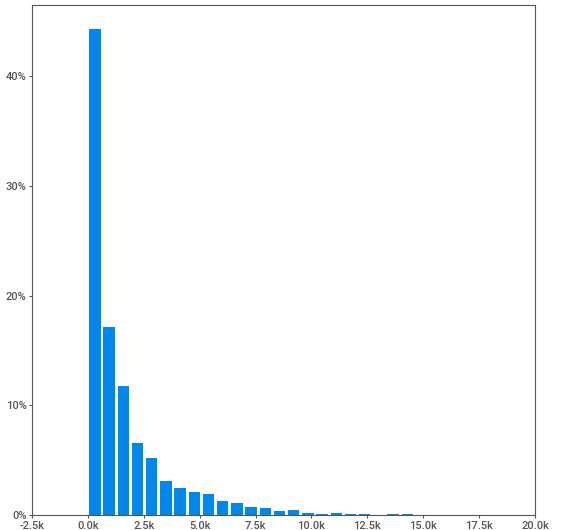
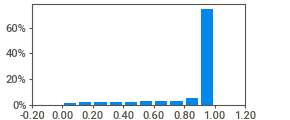
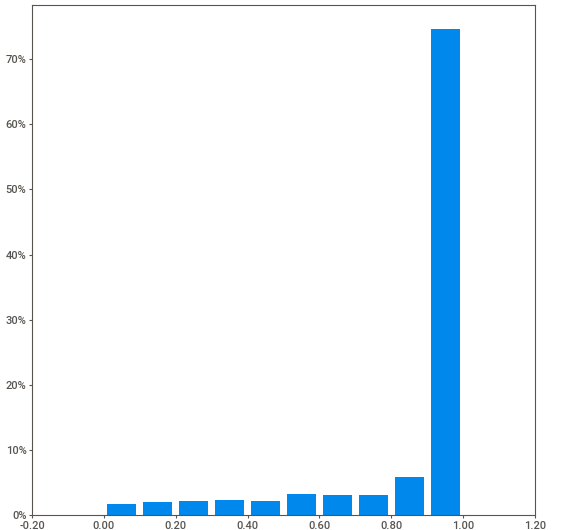
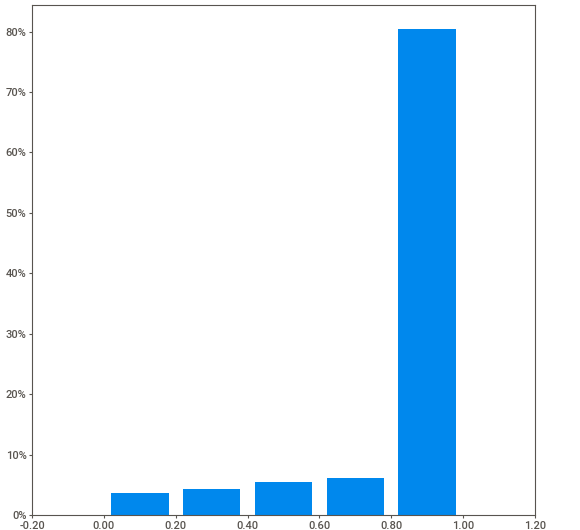
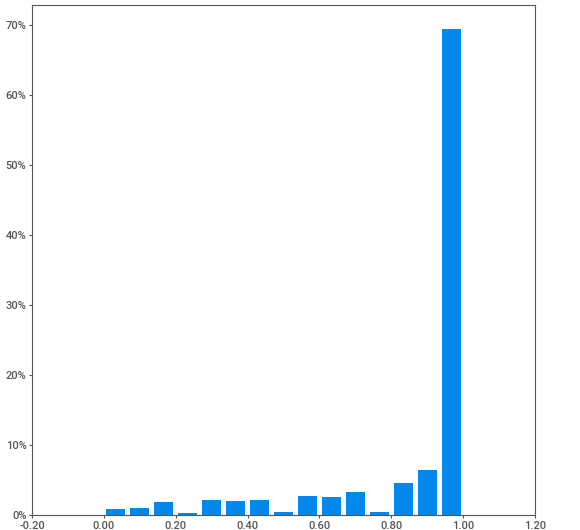
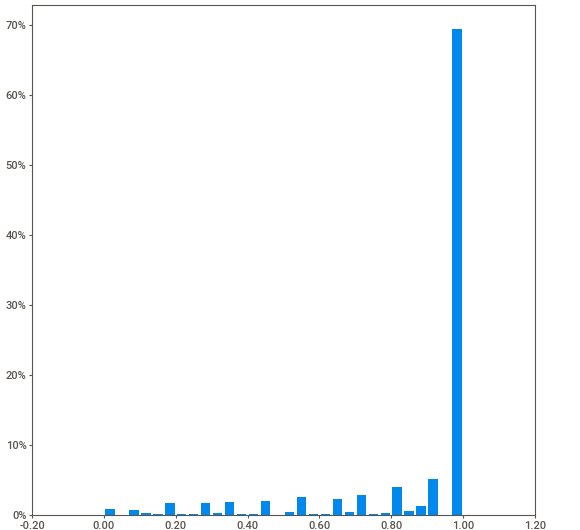
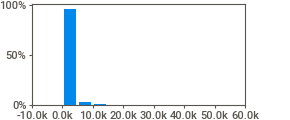
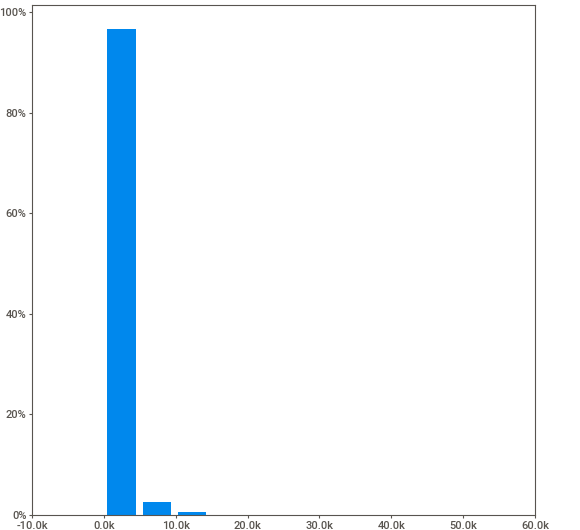
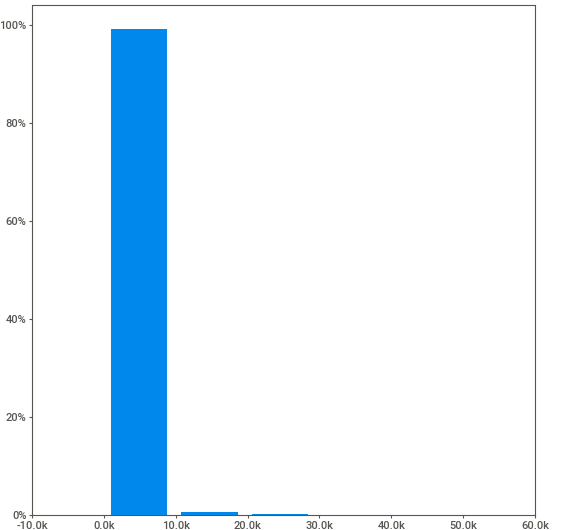
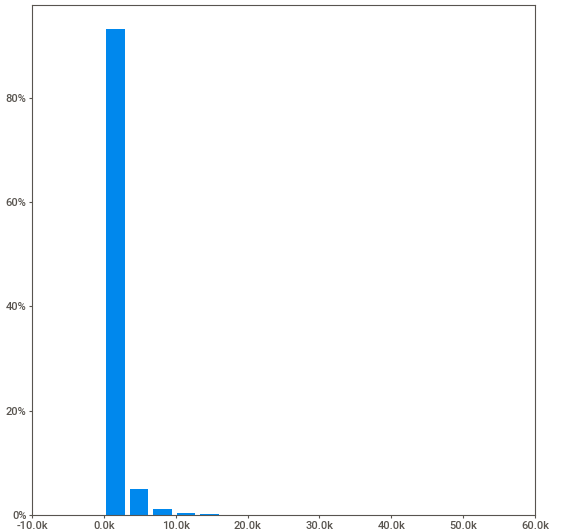
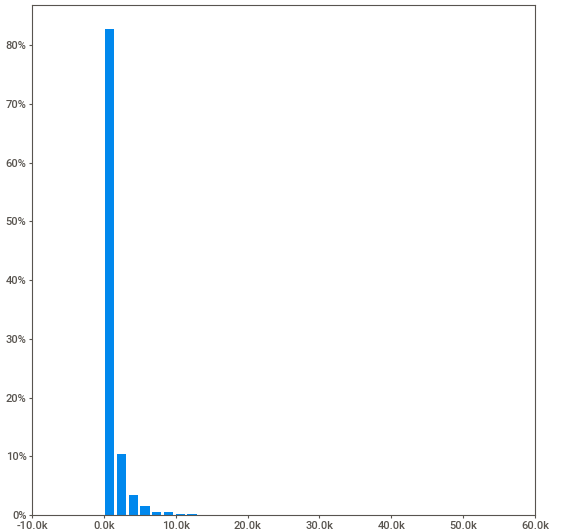
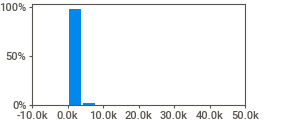
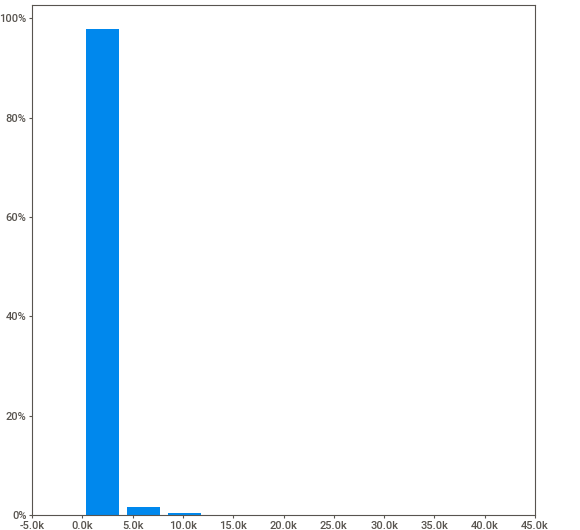
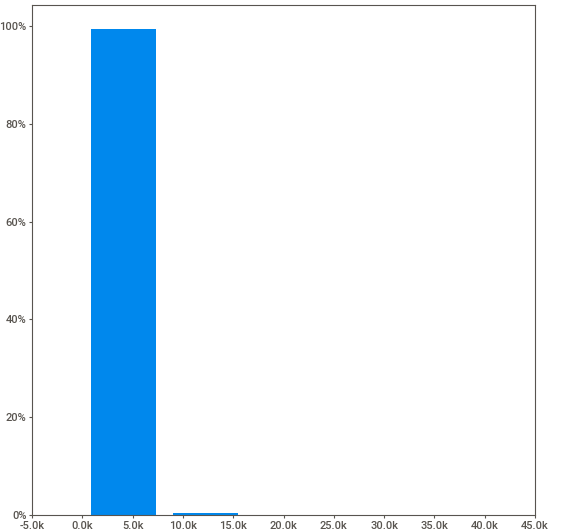
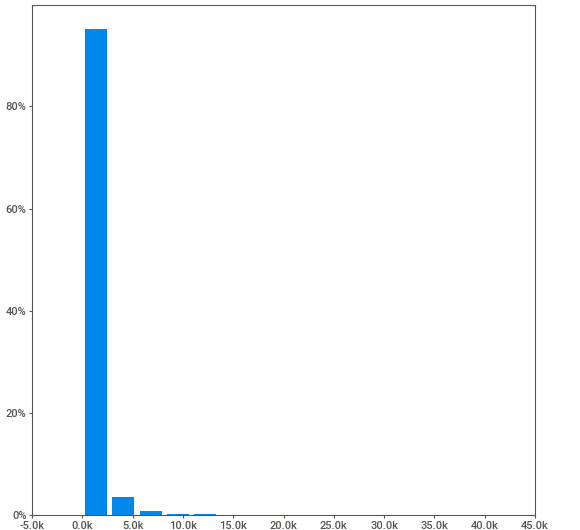
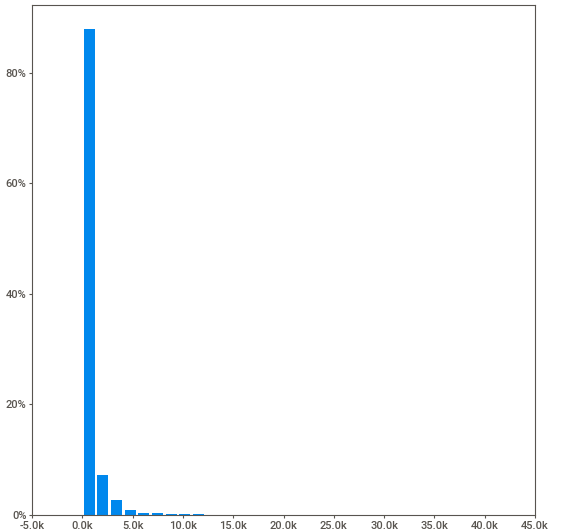
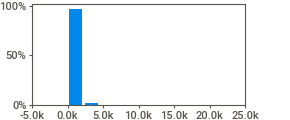
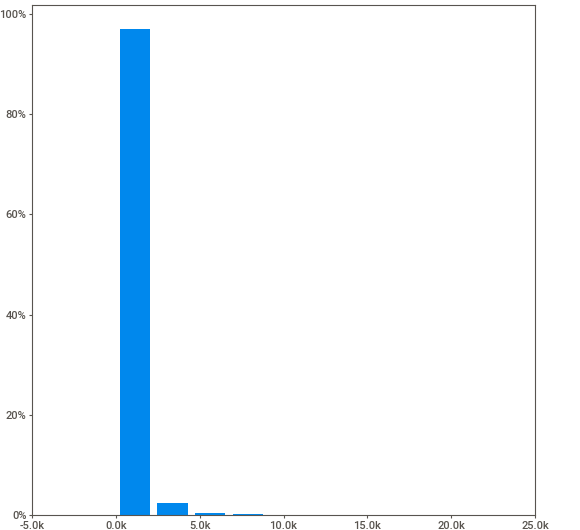
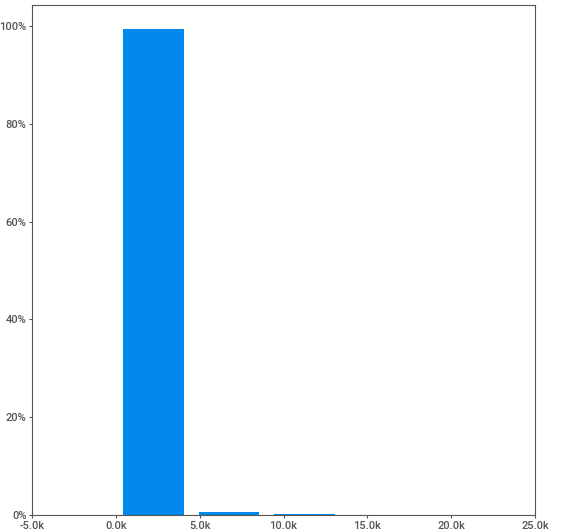
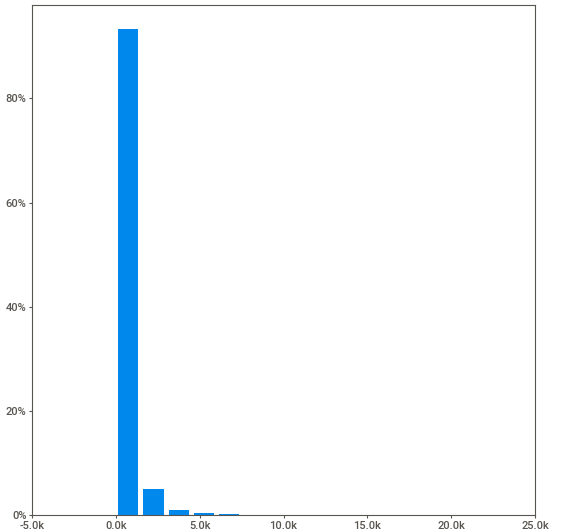
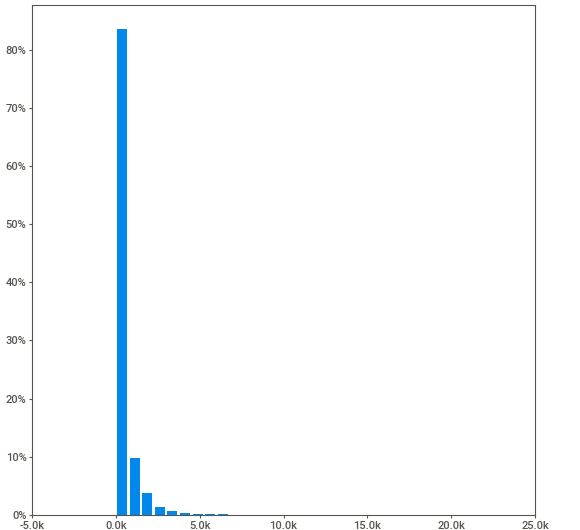
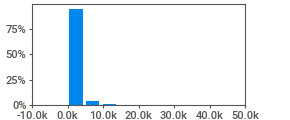
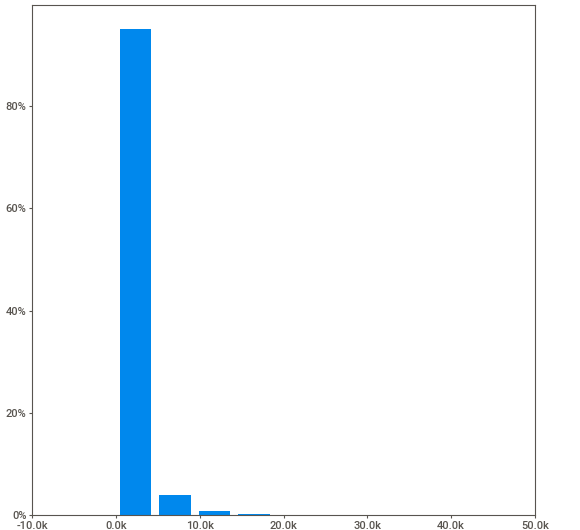
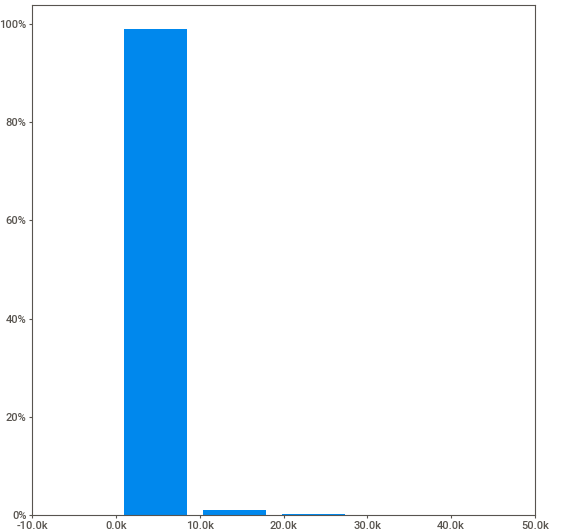
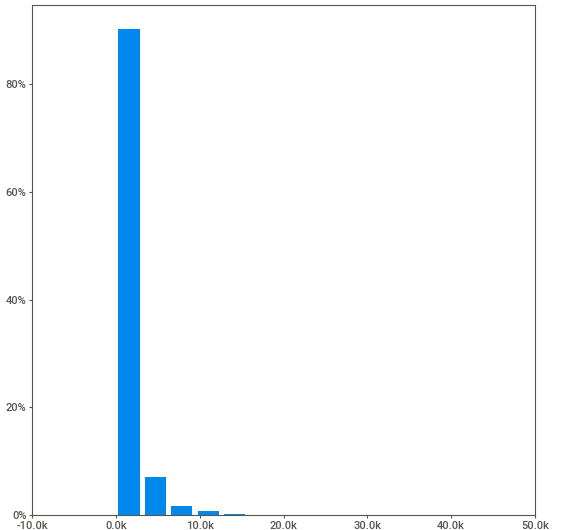
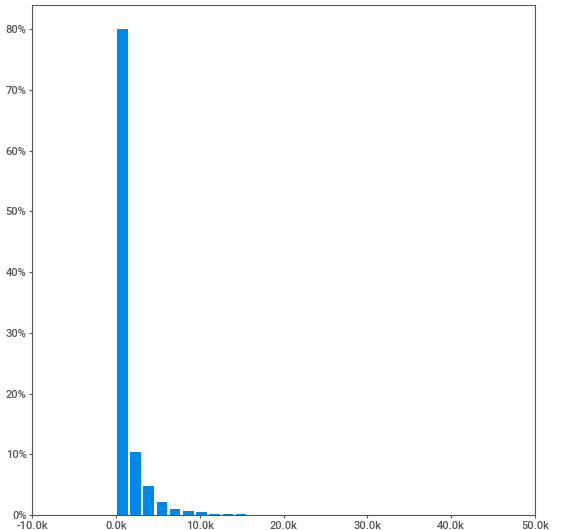
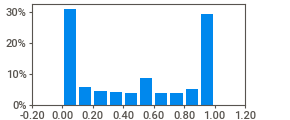
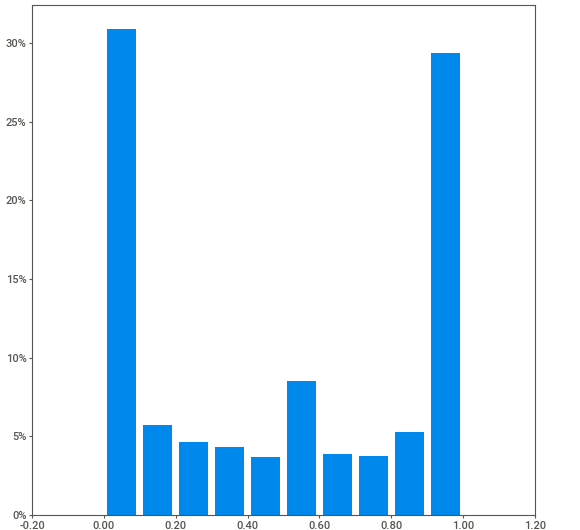
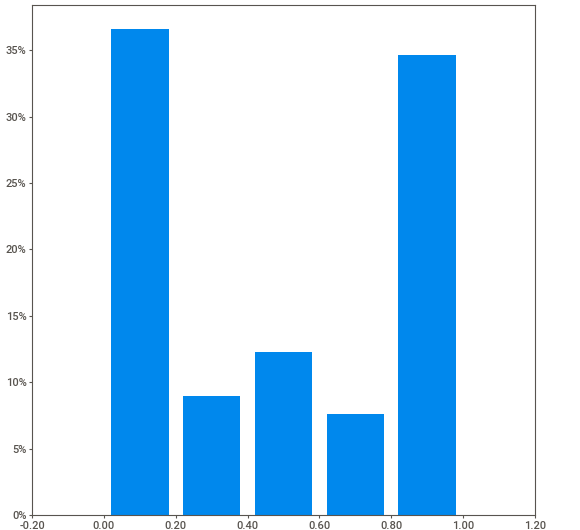
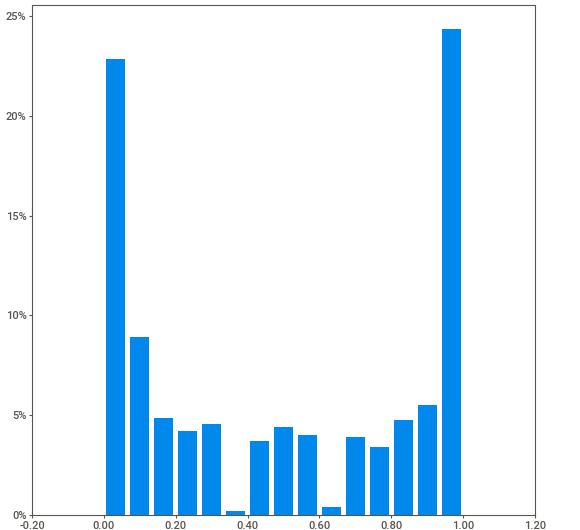
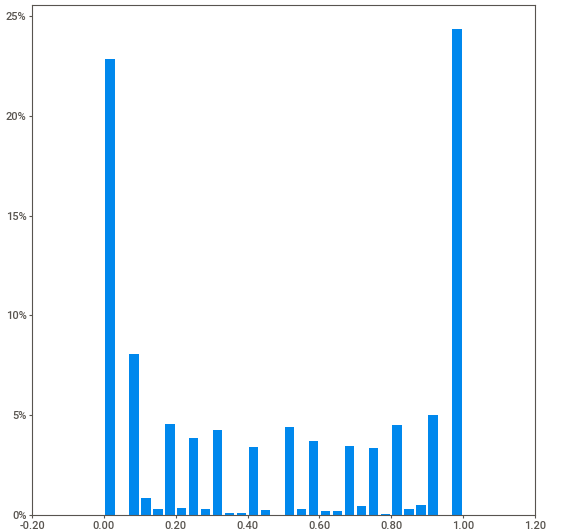
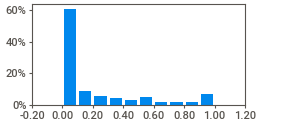
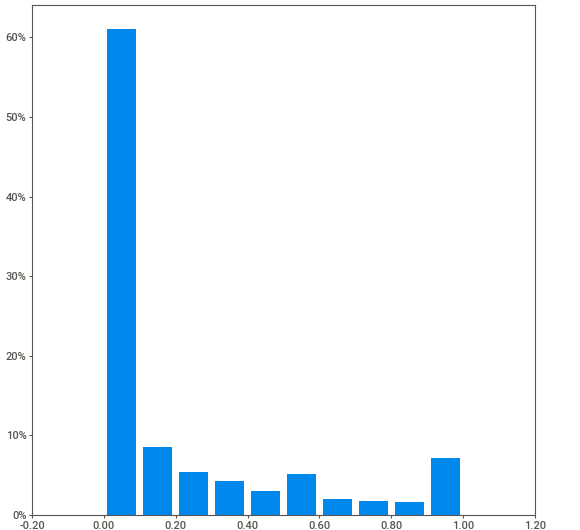
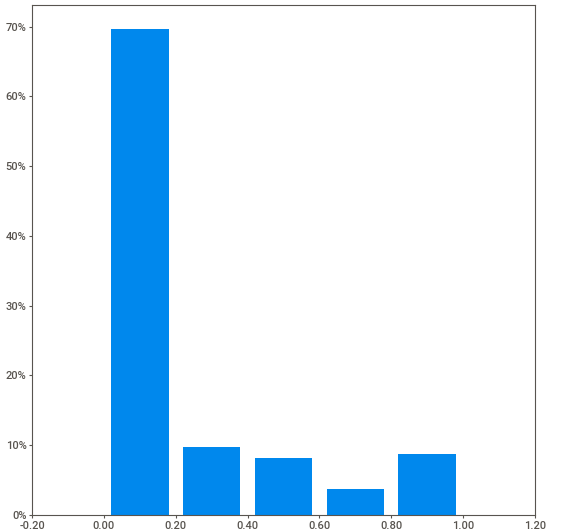
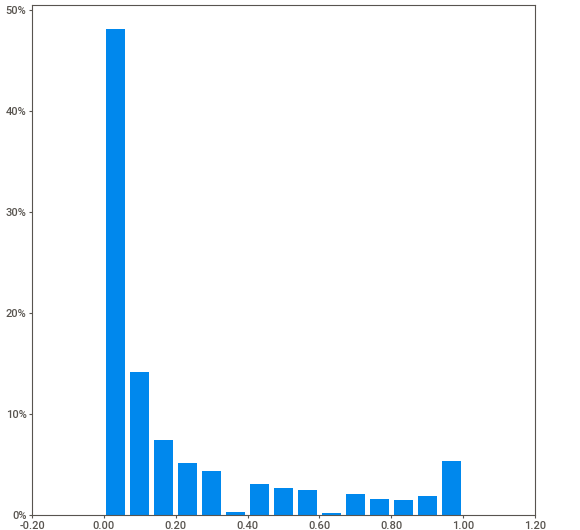
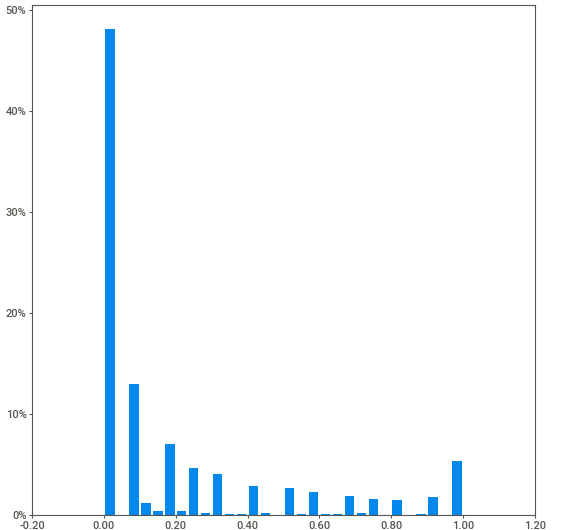
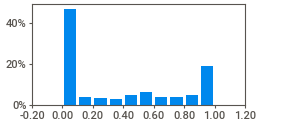
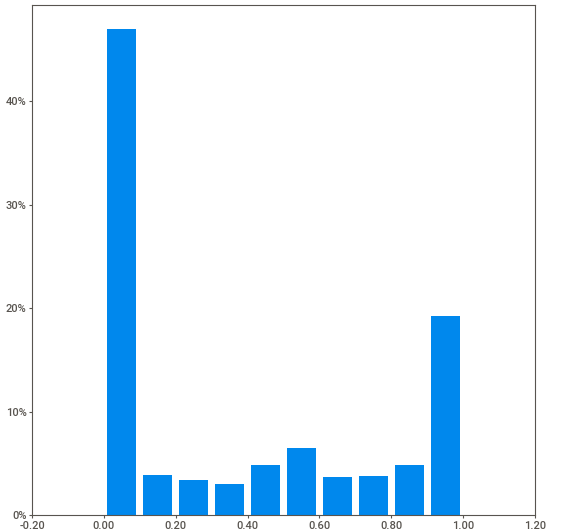
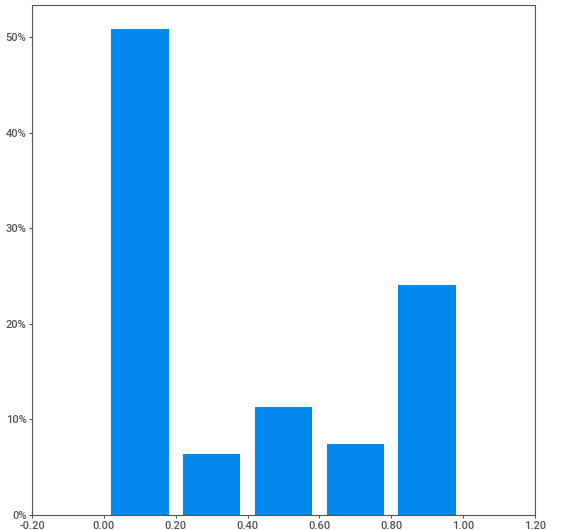
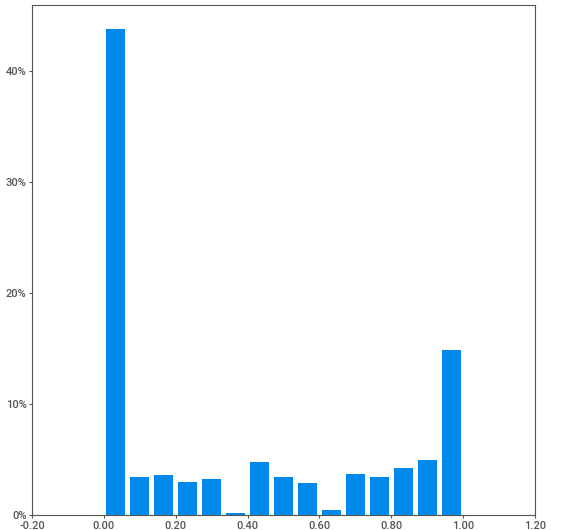
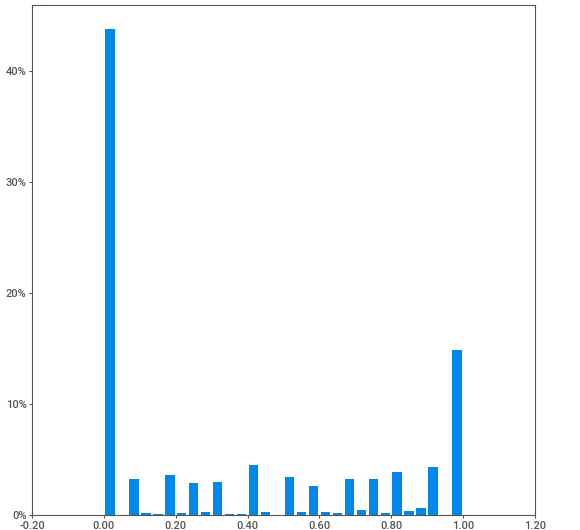
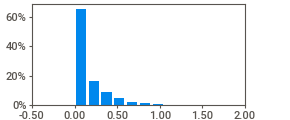
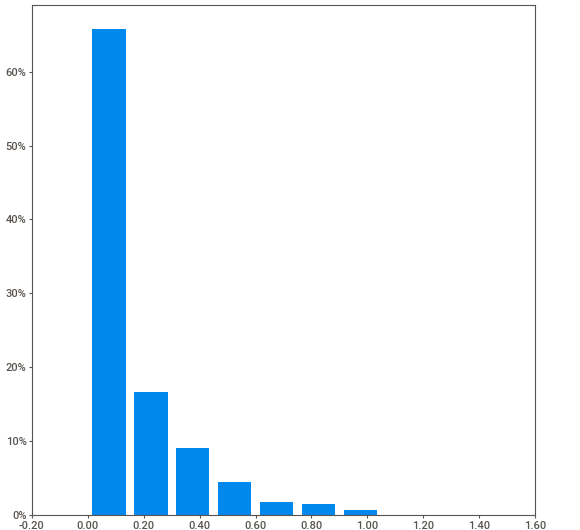
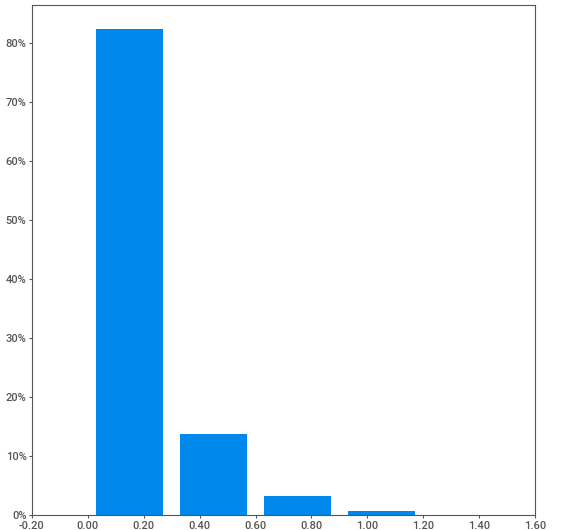
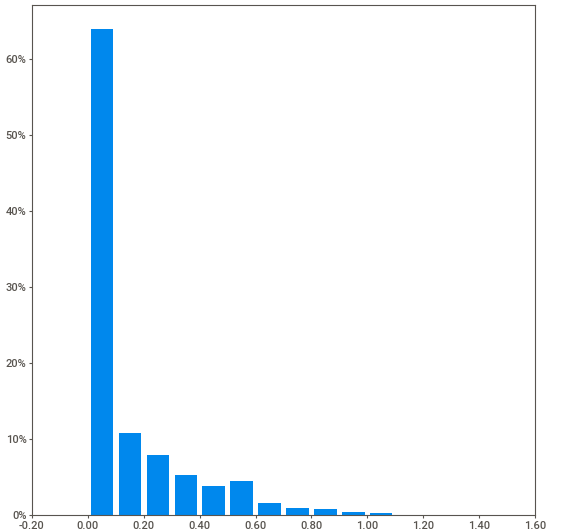
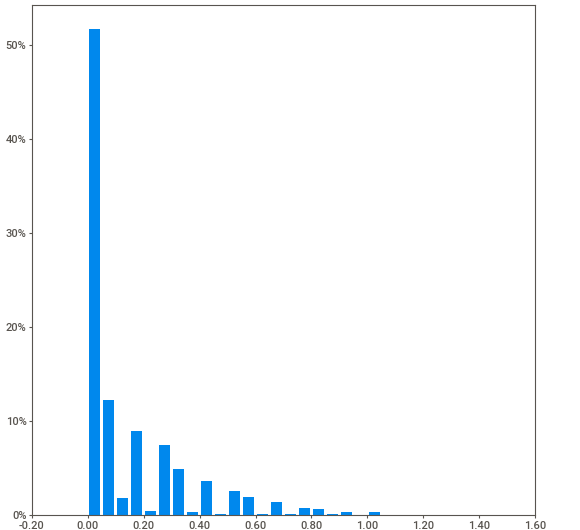
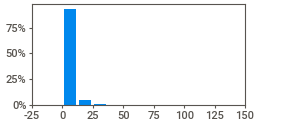
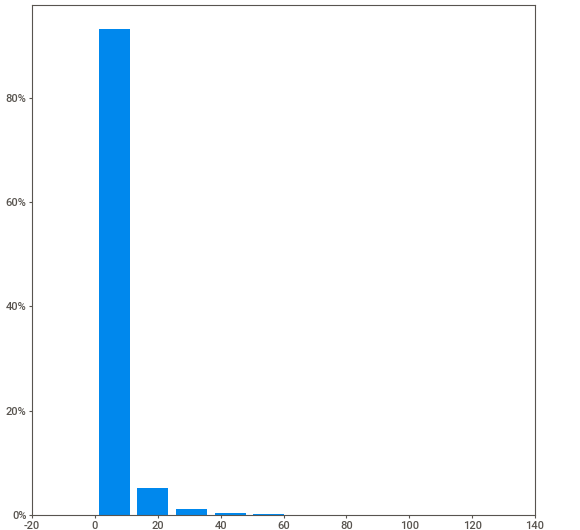
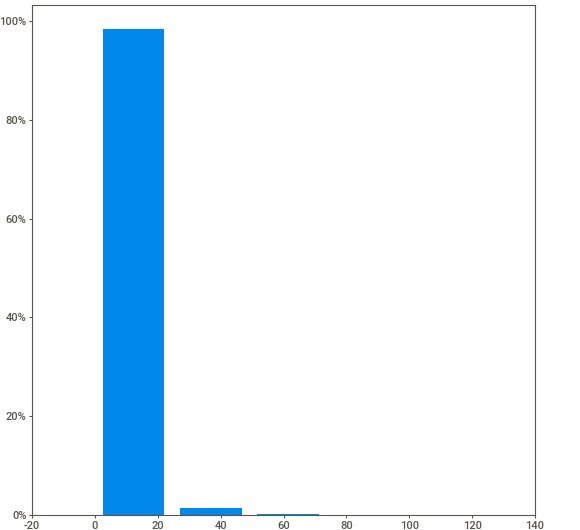
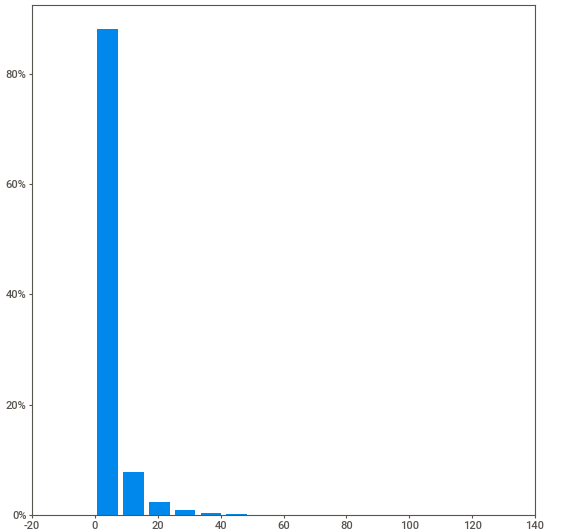
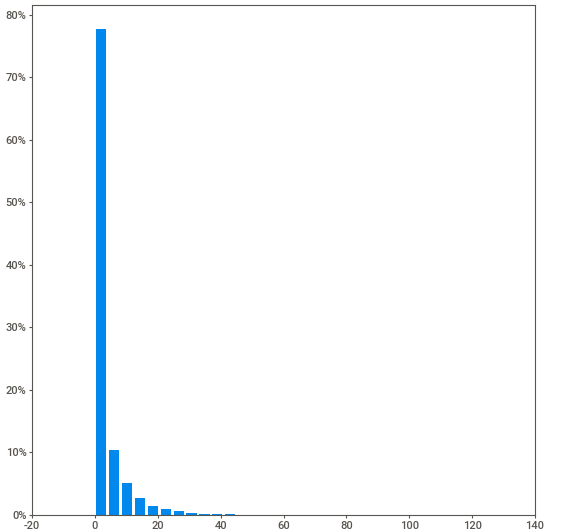
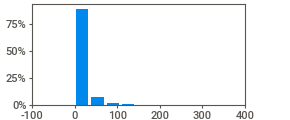
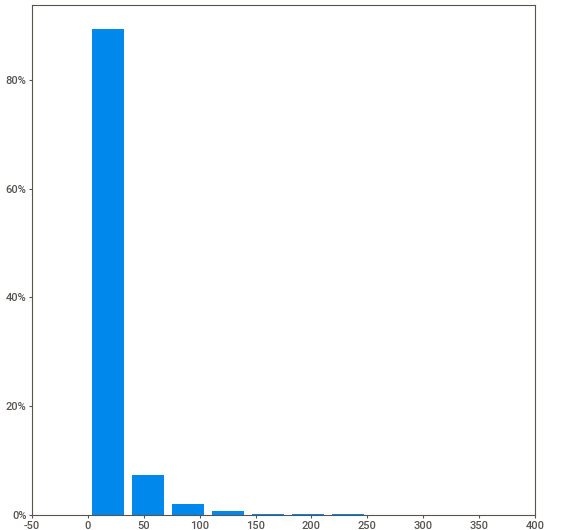
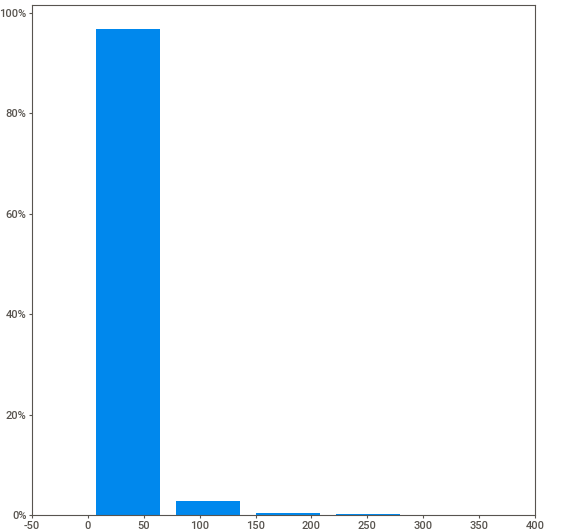
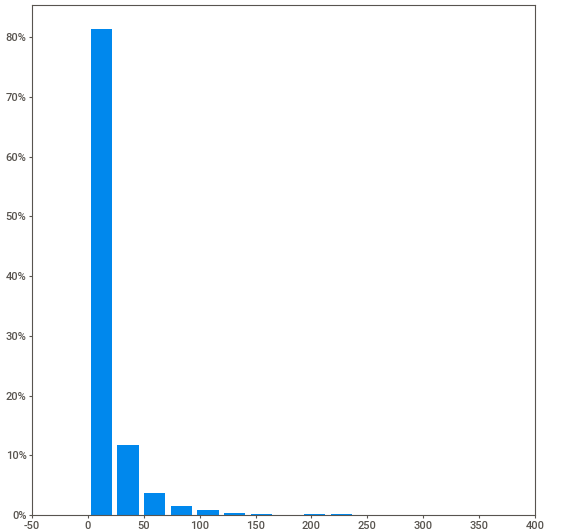
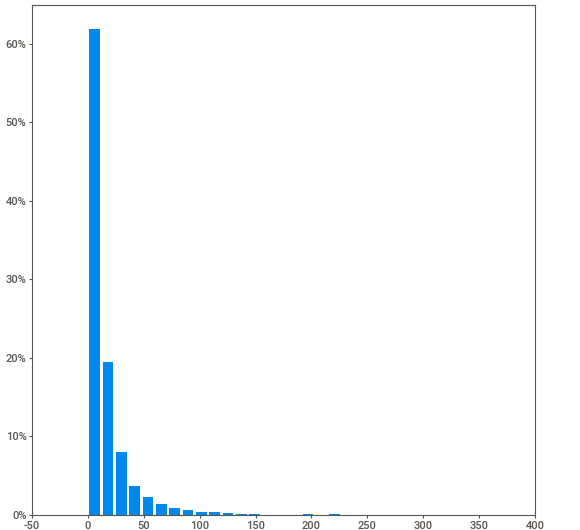
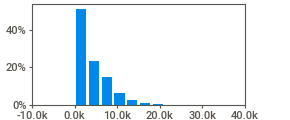
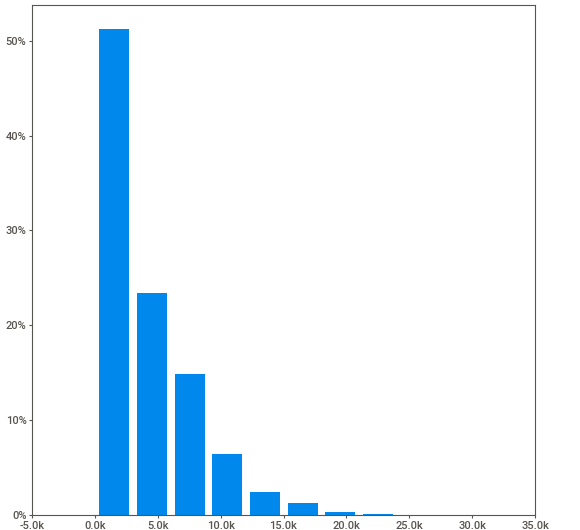
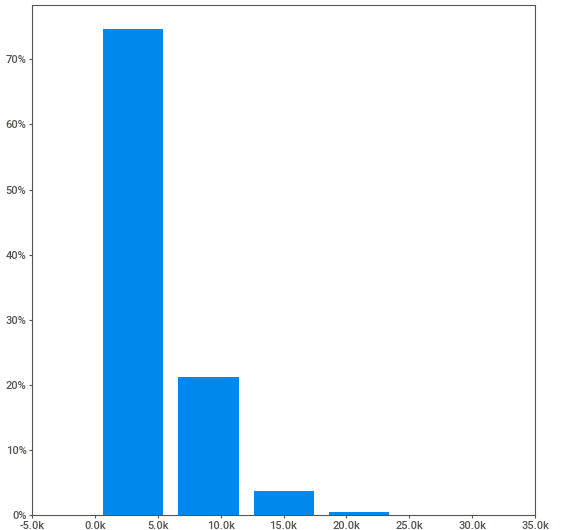
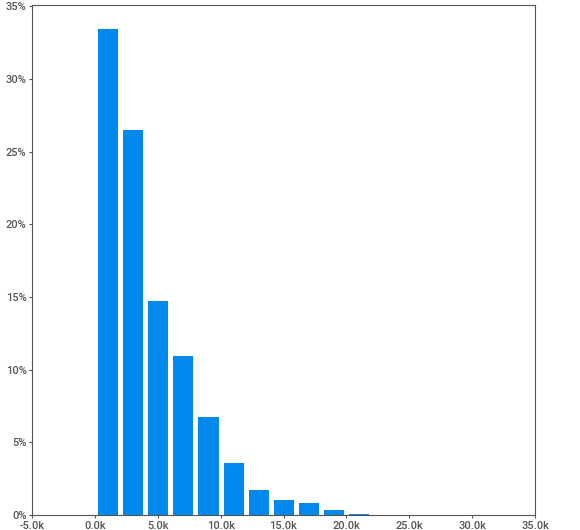
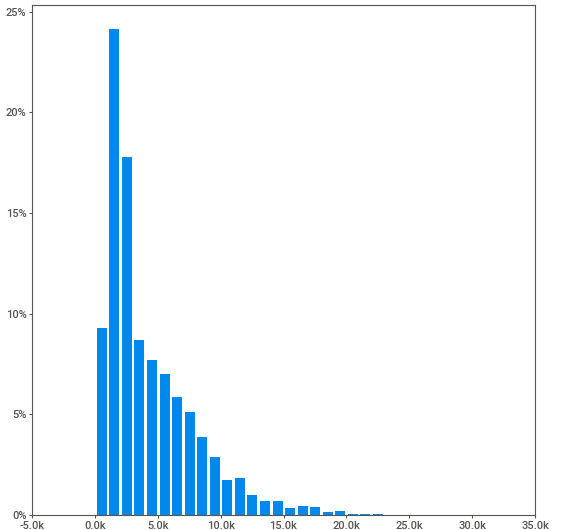
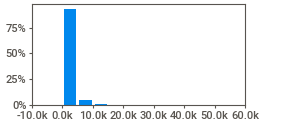
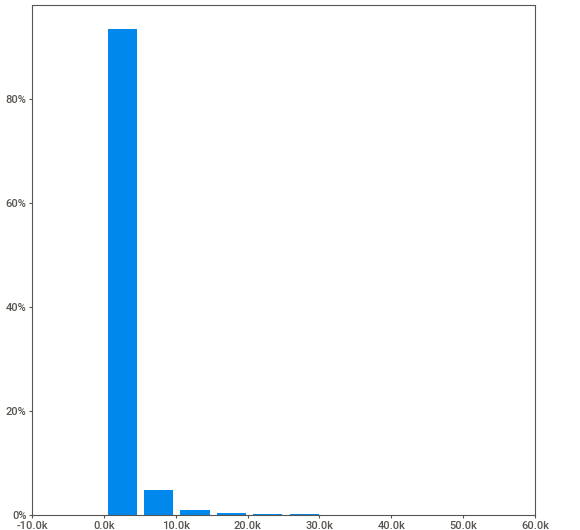
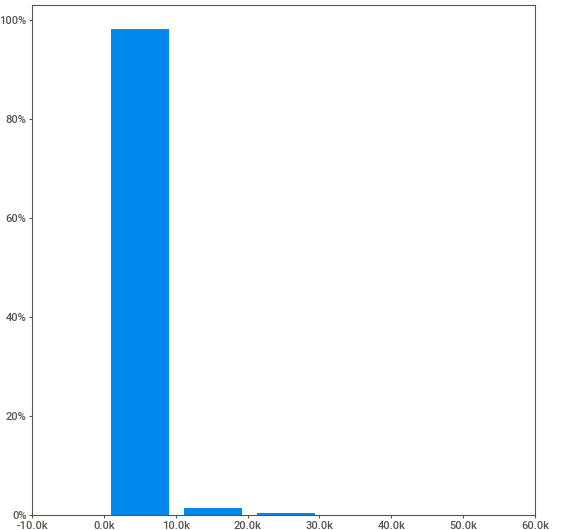
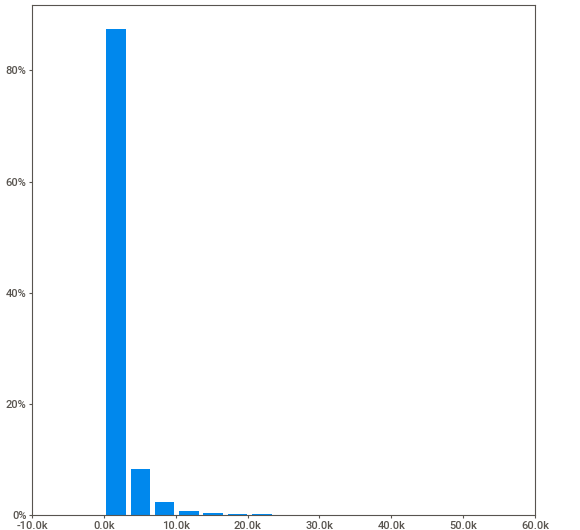
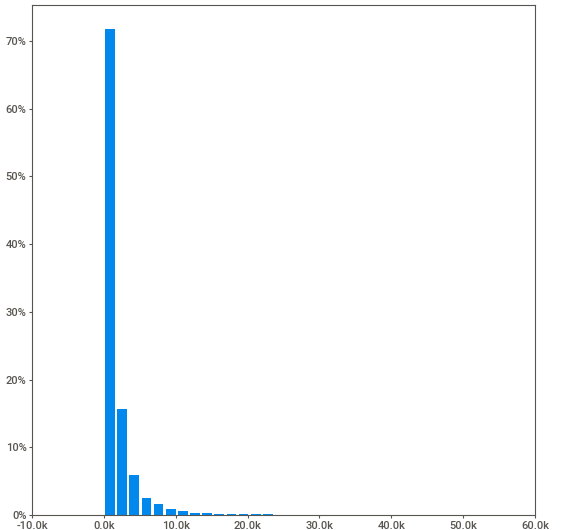
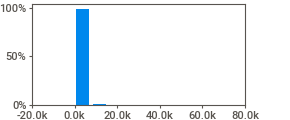
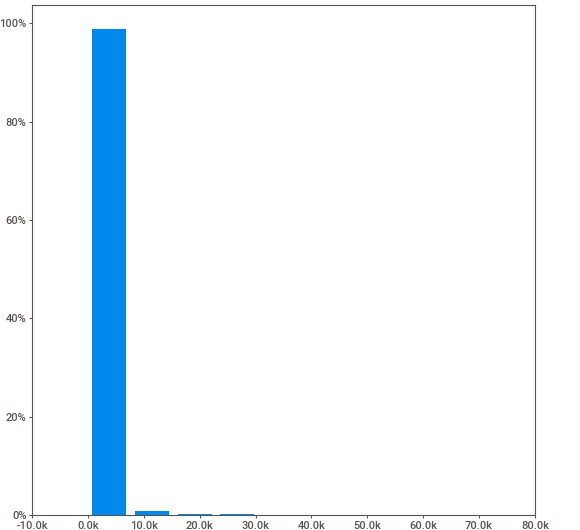
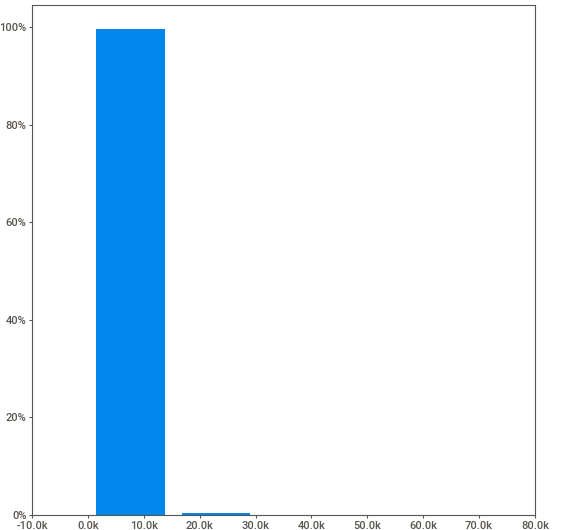
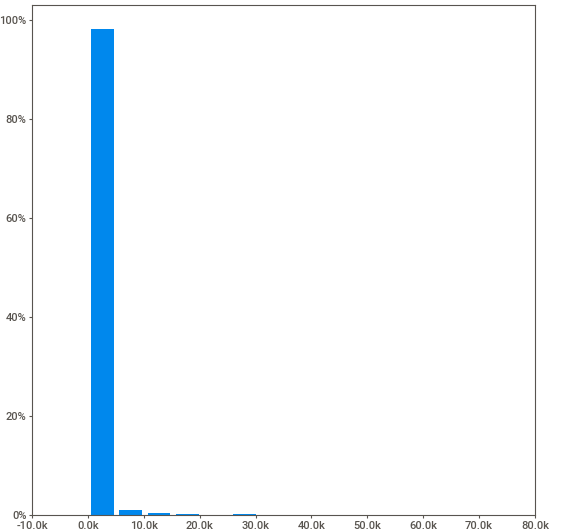
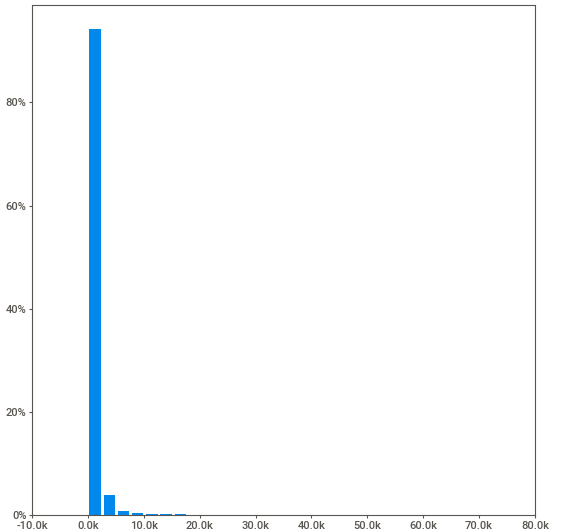
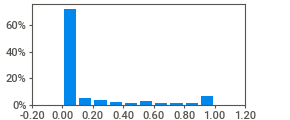
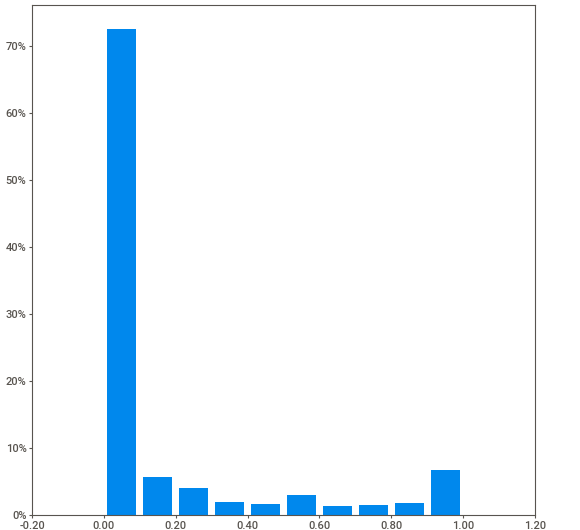
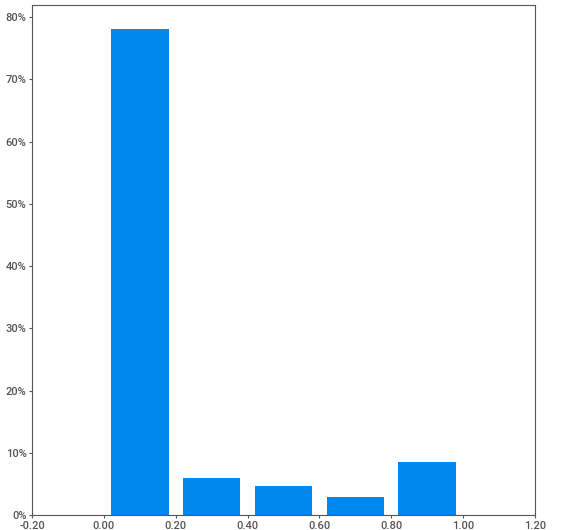
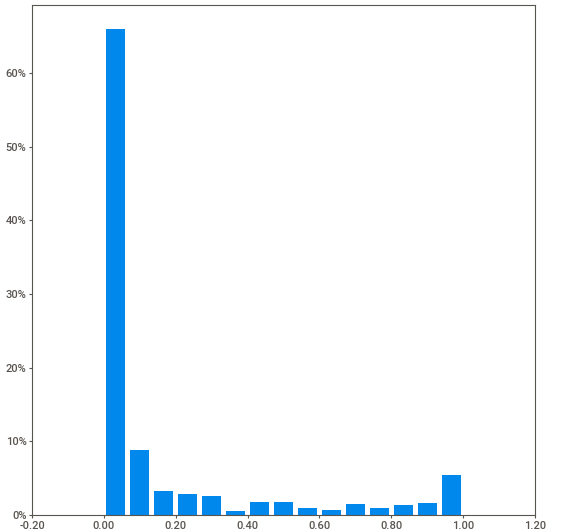
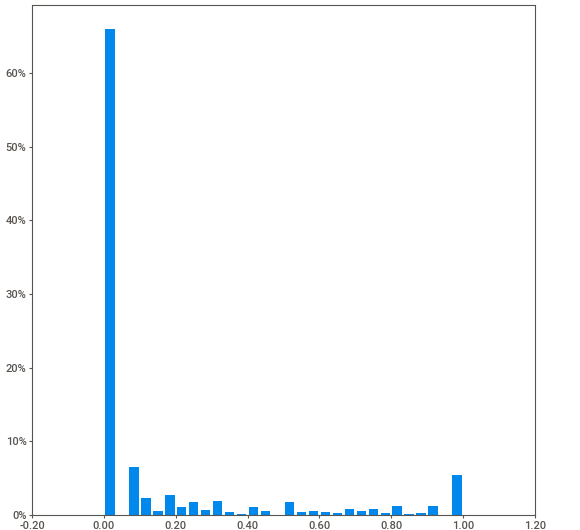
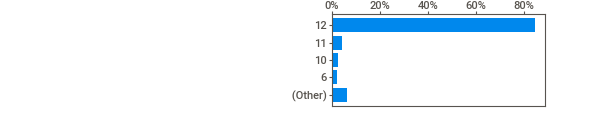
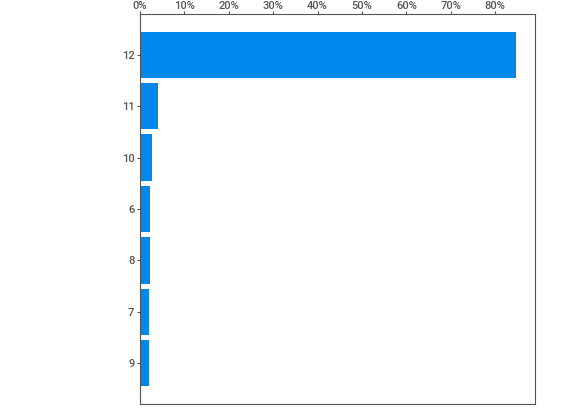
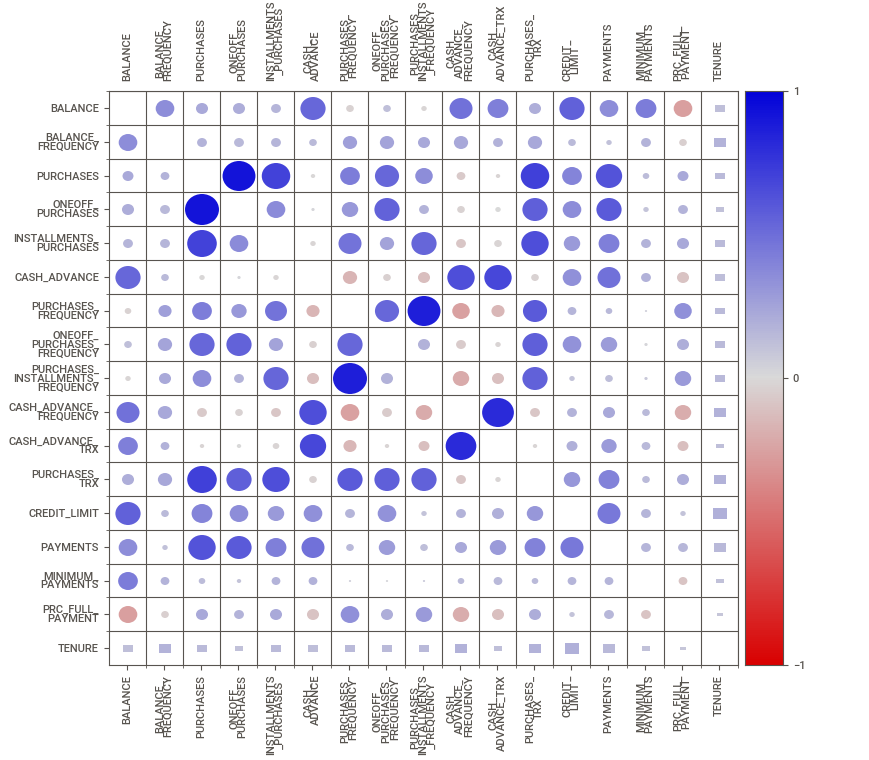
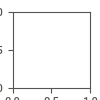

In [8]:
report.show_notebook()

In [14]:
data.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [13]:
data=data.dropna(subset=['CREDIT_LIMIT'])

In [23]:
data.MINIMUM_PAYMENTS.median()

312.4522915

In [25]:
data['MINIMUM_PAYMENTS']=data['MINIMUM_PAYMENTS'].fillna(data.MINIMUM_PAYMENTS.median())

In [31]:
del data['CUST_ID']

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

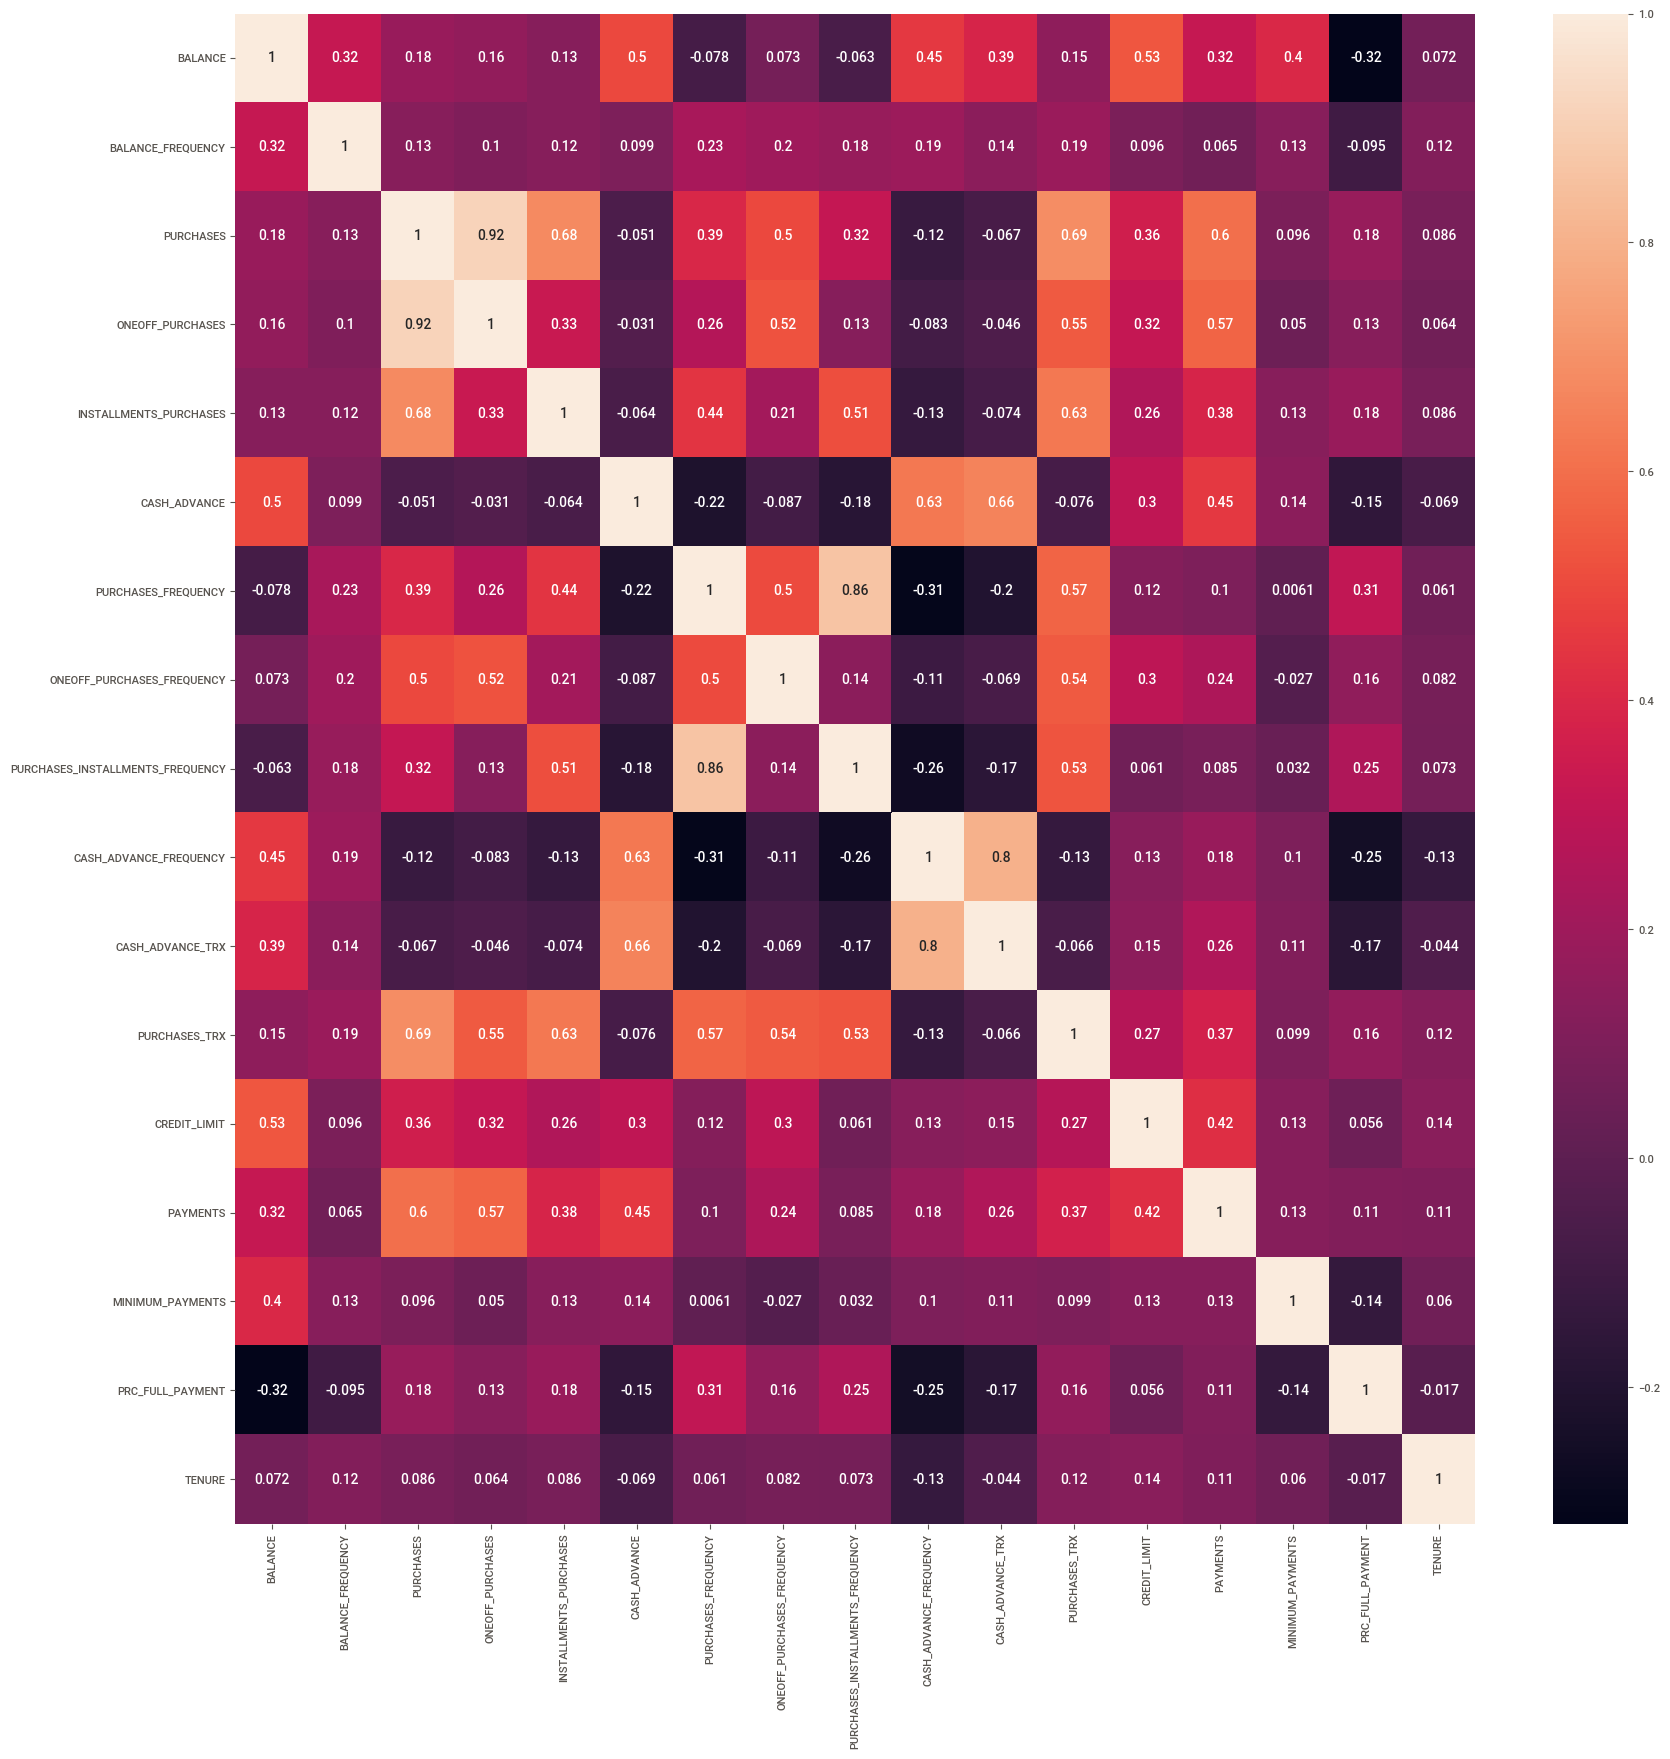

In [40]:
a,b=plt.subplots(figsize=(20,20))
sns.heatmap(data.corr(),annot=True)

In [43]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
data_new=std.fit_transform(data)

In [54]:
numbers=20
score=[]
from sklearn.cluster import KMeans
for i in range(numbers):
    try:
        kmeans=KMeans(n_clusters=i)
        kmeans.fit(data_new)
        score.append(kmeans.inertia_)
    except:
        pass

    

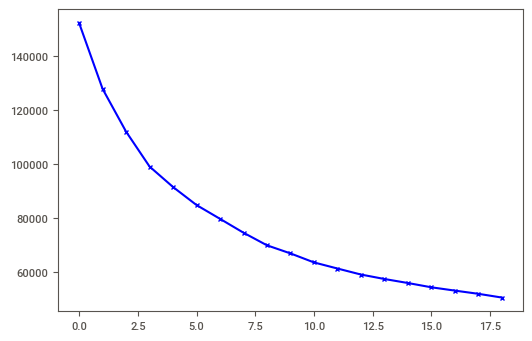

In [58]:
plt.plot(score,'bx-')

In [ ]:
#Lets decide k=8

In [78]:
kmeans=KMeans(n_clusters=8,random_state=42)
model=kmeans.fit(data_new)

In [79]:
label=model.labels_

In [80]:
set(label)

{0, 1, 2, 3, 4, 5, 6, 7}

In [81]:
labels=model.predict(data_new)

In [82]:
labels[:100]

array([1, 2, 3, 1, 1, 4, 0, 4, 1, 7, 4, 1, 4, 4, 1, 2, 5, 7, 4, 4, 4, 0,
       4, 2, 1, 4, 1, 4, 2, 1, 2, 4, 1, 3, 4, 1, 2, 3, 2, 2, 1, 1, 1, 1,
       4, 1, 5, 1, 3, 1, 2, 3, 1, 3, 4, 1, 1, 3, 1, 1, 1, 1, 1, 7, 4, 1,
       5, 1, 4, 1, 4, 2, 5, 1, 1, 4, 3, 4, 1, 2, 4, 7, 7, 7, 3, 3, 2, 2,
       1, 2, 0, 2, 1, 1, 1, 1, 3, 1, 7, 5])

In [87]:
final_dataset=pd.DataFrame(data=std.inverse_transform(data_new),columns=data.columns)

In [89]:
final_dataset['labels']=labels

In [90]:
final_dataset.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,labels
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,2.018021e+02,139.509787,0.000000,12.0,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4.103033e+03,1072.340217,0.222222,12.0,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,6.220667e+02,627.284787,0.000000,12.0,3
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,-2.273737e-13,312.452292,0.000000,12.0,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,6.783348e+02,244.791237,0.000000,12.0,1


# PCA:-

In [93]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_columns=pca.fit_transform(data_new)

In [95]:
red_data=pd.DataFrame(data=reduced_columns,columns=['col1','col2'])

In [96]:
red_data['clusters']=labels

In [97]:
red_data.head()

,col1,col2,clusters
0,-1.683768,-1.072581,1
1,-1.134850,2.508667,2
2,0.969064,-0.383432,3
3,-0.888422,0.004413,1
4,-1.600262,-0.684067,1


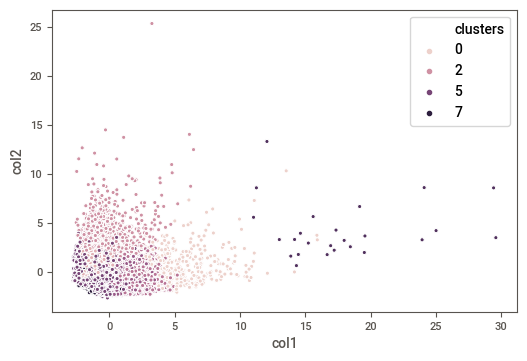

In [110]:
sns.scatterplot(x='col1',y='col2',hue='clusters',data=red_data)#,'gray','purple','pink'])